# K Means Clustering

Implementation of the Soft K-Means Clustering algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's generate dataset to apply the clustering algorithm to

In [2]:
def generate_data(num_centers):
    
    max_dots_per_cluster = 50
    min_dots_per_cluster = 10
    
    # We have to return this
    X = []
    
    # For each cluster center
    for k in range(num_centers):
        # Create a random center point between -10 and 10 (for both x and y)
        x_mean = np.random.randint(-8, 8)
        y_mean = np.random.randint(-8, 8)
        
        # Number of dots in this cluster
        dots_in_this_cluster = np.random.randint(min_dots_per_cluster, max_dots_per_cluster)
        
        # Generate random points around this center
        dots = np.random.randn(dots_in_this_cluster, 2) + [x_mean, y_mean]
        
        # TODO: Improve the below loop, make it a single line of code
        for d in dots:
            X.append(d)
            
    X = np.array(X)
    return X
        
        

Try out the generate_data() function

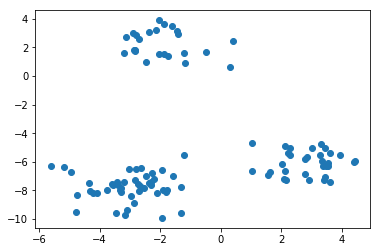

In [3]:
X = generate_data(3)
plt.scatter(X[:,0], X[:,1])
plt.show()

Utility function, to calculate euclidean distance between two points

In [4]:
def distance(a, b):
    diff = a - b
    dist = np.sqrt(np.dot(diff, diff))
    return dist

Cost function for K Means

In [5]:
def soft_kmeans_cost(X, M, R):
    """Cost function for K Means
    
    Args:
        X: The matrix of all data points (N x D)
        M: The current center of the clusters (K x D)
        R: The rank of each cluster centers (N x K)
            where N = number of datapoints
                  D = dimention of the data (2 in our case)
                  K = number of clusters
    Return:
        Cost value of K Means
    """
    
    cost = 0.0
    for k in range (len(M)):
        # TODO - Squash the loop
        for n in range(len(X)):
            cost += R[n, k] * distance(M[k], X[n])
    return cost

Soft K Means implementation

In [9]:
def soft_kmeans(X, num_clusters, max_iter=300, beta=1.0):
    
    num_data, dim = X.shape
    
    M = np.zeros((num_clusters, dim))
    E = np.empty((num_data, num_clusters))
    
    # Initialize K cluster centers
    for k in range(num_clusters):
        M[k] = X[np.random.choice(num_data)]
    
    cost = np.zeros((max_iter, 1))
    
    # While not converged (do for specified iterations)
    for i in range(max_iter):
        
        # Step 1: Calculate cluster responsibilities
        for n in range(num_data):
            for k in range(num_clusters):
                E[n, k] = np.exp(-beta * distance(M[k], X[n]))
                
        R = E / E.sum(axis=1, keepdims=True)
        
        # Step 2: Recalculate means
        for k in range(num_clusters):
            M[k] = R[:,k].dot(X) / R[:,k].sum()
            
        cost[i] = soft_kmeans_cost(X, M, R)
        
        if i > 0 and (cost[i] - cost[i-1]) < 1e-3:
            break
        
    return M, R

In [10]:
num_clusters_guess = 3
M, R = soft_kmeans(X, num_clusters_guess)

* M should have coordinates of the clusters as learnt by soft K Means
* There should be one entry per data point in R. Each entry will have one value for each cluster. The one where the data point belongs to will have a value near to 1. Rest will have values near to 0.

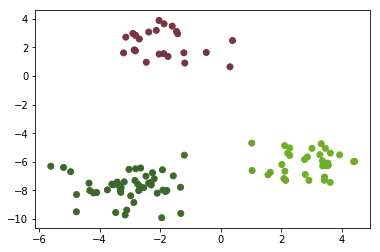

In [11]:
random_colors = np.random.random((num_clusters_guess, 3))
colors = R.dot(random_colors)
plt.scatter(X[:,0], X[:,1], c=colors)
plt.show()

### Fail cases

There are certain data formations which K Means cannot cluster upon:

* Donut shape data
* Elongated gaussians
* Gaussians with different densities

References:

* https://www.udemy.com/cluster-analysis-unsupervised-machine-learning-python
* https://www.youtube.com/watch?v=b9gPL6NvsnA&list=PLBv09BD7ez_6lYVoZ1RzVcOPIT5Lfjo0Y
* Udacity MLND
